# Numpy

In [10]:
import numpy as np #np is a very popular abbreviation for numpy

# Matrices

# Scatter plots

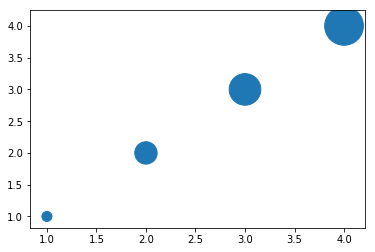

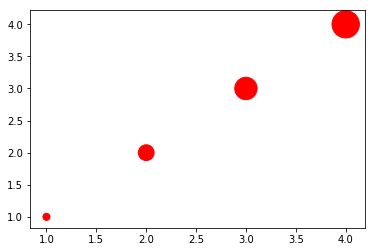

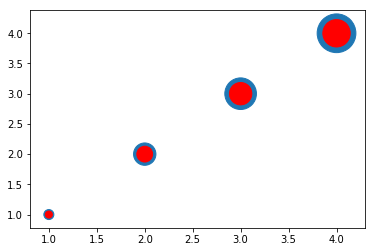

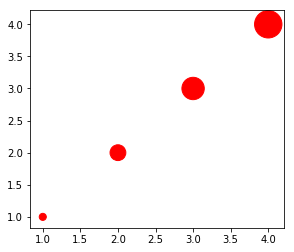

In [11]:
import matplotlib.pyplot as plt

# Create some simple data:
x_axis = [1,2,3,4]
y_axis = [1,2,3,4]
sizes = [100,500,1000,1500]
plt.scatter(x_axis, y_axis, s=sizes)

# Show plot
plt.show()


# Create some simple data:
sizes2 = [size/2 for size in sizes]

plt.scatter(x_axis, y_axis, s=sizes2, c='red')

# Show plot
plt.show()

plt.scatter(x_axis, y_axis, s=sizes)

plt.scatter(x_axis, y_axis, s=sizes2, c='red')

# Show plot
plt.show()

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(x_axis, y_axis, s=sizes2,c='red');

In [12]:
import pydst
import pandas
Dst = pydst.Dst(lang='en')

In [13]:
Dst.get_subjects()

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


In [14]:
Dst.get_data(table_id = 'INDKP107')

,OMRÅDE,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,TID,INDHOLD
0,All Denmark,People with type of income (number),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),2004,1487917


In [15]:
Dst.get_variables(table_id='INDKP107')

,elimination,id,map,text,time,values
0,True,OMRÅDE,denmark_municipality_07,region,False,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,False,ENHED,NaN,unit,False,"[{'id': '101', 'text': 'People with type of in..."
2,True,KOEN,NaN,sex,False,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,False,UDDNIV,NaN,level of education,False,"[{'id': '10', 'text': '10 BASIC SCHOOL 8-10 gr..."
4,False,INDKOMSTTYPE,NaN,type of income,False,"[{'id': '100', 'text': '1 Disposable income (2..."
5,False,Tid,NaN,time,True,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


In [44]:
edu_list = Dst.get_variables(table_id='INDKP107')['values'][3]
Dst.get_variables(table_id='INDKP107')['values'][4]

[{'id': '100', 'text': '1 Disposable income (2+30-31-32-35)'},
 {'id': '105', 'text': '2 Pre-tax Income, total (3+7+22+26+29)'},
 {'id': '110', 'text': '3 Primary income (4+5+6)'},
 {'id': '115', 'text': '4 Wages and salaries etc., total'},
 {'id': '120', 'text': '5 Entrepreneurial income, total'},
 {'id': '125',
  'text': '6 Received fees subject to labour market contributions'},
 {'id': '130', 'text': '7 Public transfer incomes(8+14+19)'},
 {'id': '135', 'text': '8 Unemployment and cash benefits (9+10+11+12+13)'},
 {'id': '140', 'text': '9 Unemployment benefits'},
 {'id': '145', 'text': '10 Other benefits from unemployment funds'},
 {'id': '150', 'text': '11 Cash benefits'},
 {'id': '155', 'text': '12 Job training & Limited employment benefits'},
 {'id': '160', 'text': '13 Sickness- & parental leave'},
 {'id': '165', 'text': '14 Other transfers(15+16+17+18)'},
 {'id': '170', 'text': '15 Public educational grants'},
 {'id': '175', 'text': '16 Housing benefits'},
 {'id': '180', 'text':

In [17]:
edu_list.remove({'id': '9', 'text': 'Not stated'})
edu_dict = {edu['text'] : i for i, edu in enumerate(edu_list)}
edu_dict

{'10 BASIC SCHOOL 8-10 grade': 0,
 '20+25 UPPER SECONDARY SCHOOL': 1,
 '35 VOCATIONAL EDUCATION': 2,
 '40 SHORT-CYCLE HIGHER EDUCATION': 3,
 '50+60 MEDIUM-CYCLE HIGHER EDUCATION, BACHLEOR': 4,
 '65 LONG-CYCLE HIGHER EDUCATION': 5}

In [99]:
Data = Dst.get_data(table_id = 'INDKP107', variables={'OMRÅDE':['*'], 'ENHED':['101','121'],'KOEN':['mok'], 'Tid':['2018'],'INDKOMSTTYPE':['115','120'], 'UDDNIV':['*']})

In [103]:
wage_income = Data[(Data['ENHED']=='Average income for people with type of income (DKK)') & (Data['INDKOMSTTYPE']=='4 Wages and salaries etc., total') & (Data['UDDNIV']!='Not stated')]['INDHOLD']
ent_income   = Data[(Data['ENHED']=='Average income for people with type of income (DKK)') & (Data['INDKOMSTTYPE']=='5 Entrepreneurial income, total')]['INDHOLD']

people = Data[(Data['ENHED']=='People with type of income (number)') & (Data['INDKOMSTTYPE']=='4 Wages and salaries etc., total') & (Data['UDDNIV']!='Not stated')]['INDHOLD']



In [106]:
people_size = [p/1000 for p in people]

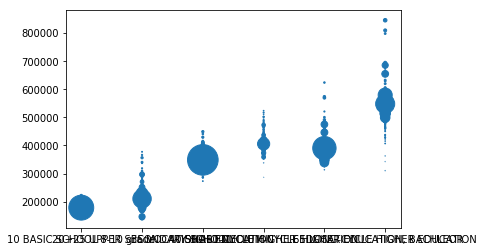

In [107]:
plt.scatter(uddniv[:-1],wage_income[:-1], s=people_size[:-1])

# Show plot
plt.show()